# Populate Data
Generate data for Sigmoid and Tanh

In [11]:
from math import tanh, exp
from sqlalchemy import create_engine
import pandas as pd

In [2]:
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [3]:
# Import modules to declare columns and column data types
from sqlalchemy import Column, Float, Integer

In [4]:
class Activation(Base):
    __tablename__ = 'activations'
    id = Column(Integer, primary_key=True)
    x = Column(Float)
    sigmoid = Column(Float)
    tanh = Column(Float)
    relu = Column(Float)

In [5]:
# Create Database Connection
# ----------------------------------
# Establish Connection
engine = create_engine("sqlite:///activation.sqlite")
conn = engine.connect()

In [6]:
# Create Table

In [7]:
Base.metadata.create_all(conn)

In [8]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [12]:
data = []
for i in range(-1000, 1001):
    x = i * 0.1
    data.append(Activation(
        x=x,
        sigmoid=1 / (1 + exp(-x)),
        tanh=tanh(x),
        relu=0 if x <= 0 else x
    ))
session.add_all(data)
session.commit()

In [34]:
query = session.query(Activation).\
    filter(Activation.x > -5).\
    filter(Activation.x < 5)
a = pd.read_sql(query.statement, session.bind).set_index('id')
a.head(5)

,x,sigmoid,tanh,relu
id,,,,
952,-4.9,0.007392,-0.999889,0.0
953,-4.8,0.008163,-0.999865,0.0
954,-4.7,0.009013,-0.999835,0.0
955,-4.6,0.009952,-0.999798,0.0
956,-4.5,0.010987,-0.999753,0.0


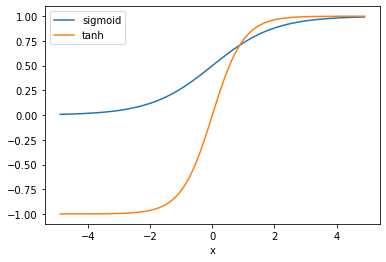

In [35]:
a[['x', 'sigmoid', 'tanh']].plot(x='x')

In [36]:
session.query(Activation.x, Activation['sigmoid'])

TypeError: 'DeclarativeMeta' object is not subscriptable